In [2]:
# Note book to Train the following models
#Logistic Regression, Decision Trees, Random Forests, and SVM 

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Test/Train Data Preparation 

decease_df = pd.read_csv('./resources/Disease_data.csv')
decease_df.shape
# Get the data types of each column
dtypes = decease_df.dtypes
# Find the unique data types
unique_dtypes = dtypes.unique()
#print("\nUnique data types in the DataFrame:")
print(unique_dtypes)


object_columns = decease_df.select_dtypes(include=['object'])
object_columns

decease_df.replace({True: 1, False: 0, '0':0 ,'False':0, 'True':1}, inplace=True)

object_columns = decease_df.select_dtypes(include=['object'])

[dtype('float64') dtype('int64') dtype('O')]


In [5]:
y = decease_df['prognosis']
X = decease_df.copy()
X.drop(columns='prognosis',inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Initialize the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")


Model: Decision Tree
Accuracy: 0.6835364337229545
Precision: 0.684987278886819
Recall: 0.6835364337229545
F1 Score: 0.6842353385550427
Confusion Matrix: [[31  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0 31]]


Model: Random Forest
Accuracy: 0.6989554837105197
Precision: 0.6957144866704396
Recall: 0.6989554837105197
F1 Score: 0.6971421163448005
Confusion Matrix: [[31  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0 31]]


Model: Naive Bayes
Accuracy: 0.717607560308381
Precision: 0.8195452905119949
Recall: 0.717607560308381
F1 Score: 0.6164818492572341
Confusion Matrix: [[31  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0 31]]


Model: SVC
Accuracy: 0.5778413330017409
Precision: 0.5650547637140237

Accuracy: 0.7197699720236245
Precision: 0.8199791422332445
Recall: 0.7197699720236245
F1 Score: 0.6193219822781106
Confusion Matrix:
[[26  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        22
                                   Acne       1.00      1.00      1.00        13
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        18
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        33
                                 Celiac

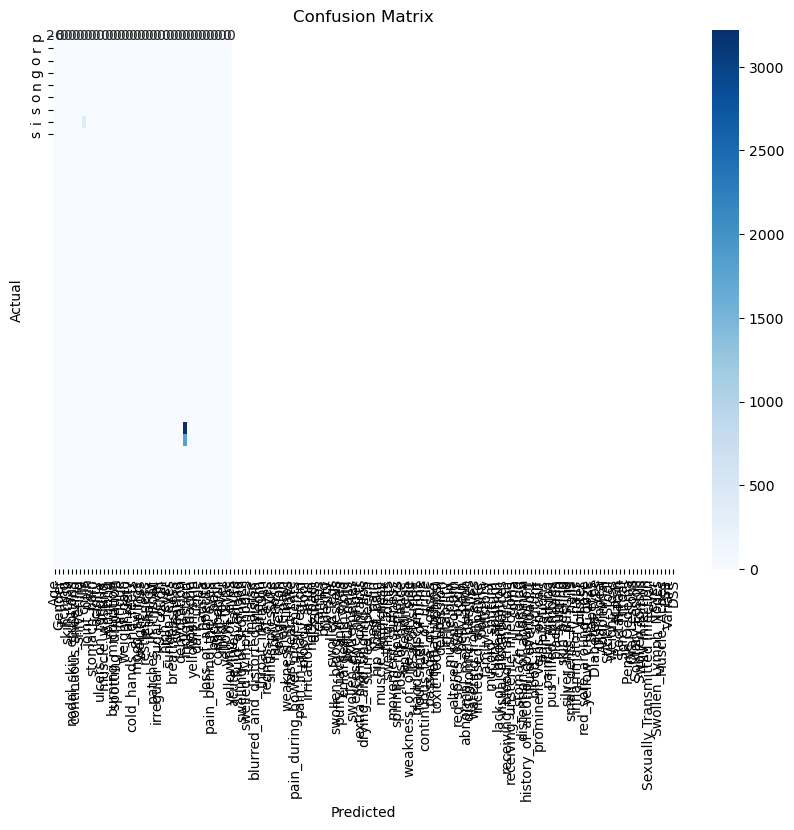

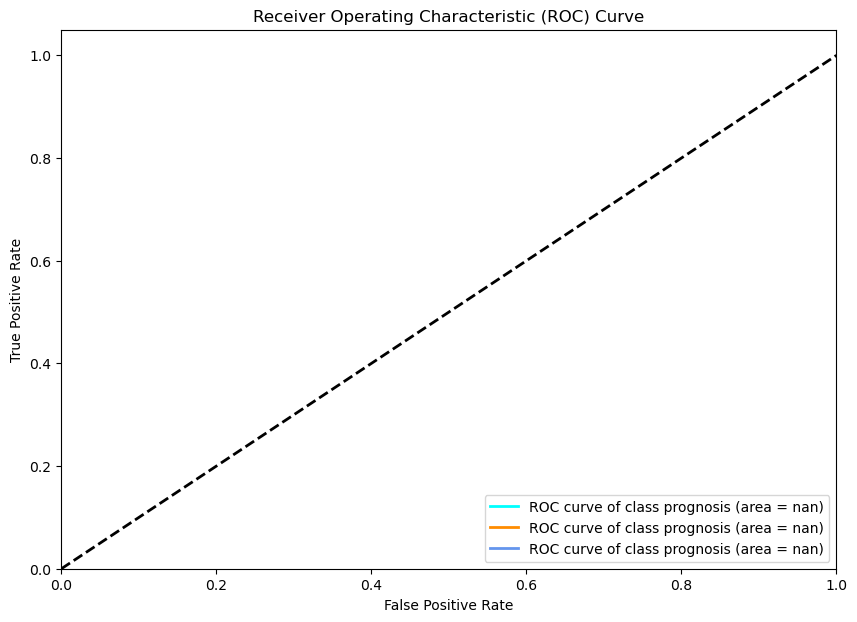

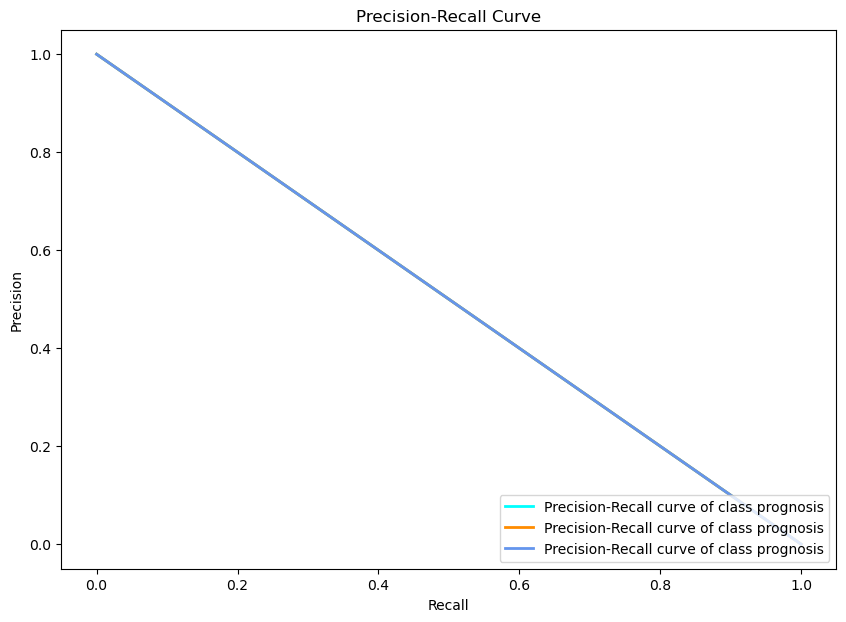

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{report}")


# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=X.columns, yticklabels=y.name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(y.name, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall curve for each class

plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label='Precision-Recall curve of class {0}'.format(y.name))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # Reduce to 20 components
X_new = pca.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Save the trained model to disk
with open('naive_bayes_model_v1.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [10]:
X.head()
X_New = X[X.columns[0:20]]
X_New.head()


,Age,Gender,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets
0,12.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Mapping of encoded labels to original labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)



Label Mapping: {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Celiac': 7, 'Cervical spondylosis': 8, 'Chicken pox': 9, 'Chronic cholestasis': 10, 'Common Cold': 11, 'Dengue': 12, 'Diabetes ': 13, 'Dimorphic hemmorhoids(piles)': 14, 'Drug Reaction': 15, 'Fungal infection': 16, 'GERD': 17, 'Gastroenteritis': 18, 'Heart attack': 19, 'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Hypertension ': 24, 'Hyperthyroidism': 25, 'Hypoglycemia': 26, 'Hypothyroidism': 27, 'Impetigo': 28, 'Jaundice': 29, 'Malaria': 30, 'Migraine': 31, 'Monkey Pox': 32, 'No disease identified': 33, 'Osteoarthristis': 34, 'Paralysis (brain hemorrhage)': 35, 'Peptic ulcer diseae': 36, 'Pneumonia': 37, 'Psoriasis': 38, 'Tuberculosis': 39, 'Typhoid': 40, 'Urinary tract infection': 41, 'Varicose veins': 42, 'hepatitis A': 43}


In [12]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Save the trained model to disk
with open('naive_bayes_model_v2.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [13]:
X_New.columns
y.name


'prognosis'